R Basics
-
Introductory Bioinformatics Sharifi Zarchi The practical sessions part 11
-
**Expression correlation diagram, analysis of experiment quality based on the distance between replicates**


Note: three methods are described in this notebook for these type of analysis

1. File recall and initial preprocessing . . .

In [1]:
library(pheatmap)
library(ggplot2)
library(reshape)
library(grid)

x = read.delim("C:/Users/abolf/Desktop/jupyter train/intro bioinf sharifi practical/SharifiZarchi-bio/Data/Endoderm.txt")
rownames(x) = x[,1]
x = x[,-1]
x = log2(x+1)
x <- na.omit(x)
dim(x)
head(x)

Warning message:
"package 'pheatmap' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'reshape' was built under R version 4.3.3"


[1] 50  9

,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
SC.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SC.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768


2. lets start with correlation

In [2]:
#cor
x.t <- t(x)
x.t

cor(x.t)
xc <- cor(x.t)
dim(xc)
xc

#we have NA variables
x.t <- x.t[,-2:-3]
x.t


,SC.1,SC.2,SC.3,DE-1,DE-2,DE-3,DE-4,DE+1,DE+2,DE+3,⋯,P5PP+1,P5PP+2,P5PE-1,P5PE-2,P5PE-3,P5PE-4,P5PE+1,P5PE+2,P5PE+3,P5PE+4
HLXb9,1.709291,1,1,7.073606,5.559798,5.725469,7.150661,7.402842,6.678072,7.177420,⋯,6.3601887,6.3476657,3.3377111,3.8288346,3.49952702,5.3847406,2.4931349,2.6438562,3.3936908,5.0682409
HHEX,1.521051,1,1,3.576522,5.241077,3.576522,5.241077,3.589763,5.241077,4.753818,⋯,4.0686708,4.0746767,0.1505597,0.8479969,0.07038933,1.2203300,0.1243281,0.1110313,0.0976108,1.1375035
HNF4a,1.956057,1,1,6.381629,5.148365,4.932156,5.988117,5.460415,4.199358,3.542258,⋯,8.4854268,8.4438967,6.8774989,6.8005117,7.26341006,6.6434233,7.9835067,7.7975967,7.2489712,7.9293176
ISL1,1.427606,1,1,4.804260,3.575312,4.804260,3.575312,5.358607,5.247168,5.547203,⋯,4.4356286,4.8659188,3.4776773,3.5945485,3.47767733,3.5945485,4.3334237,4.2750070,4.3334237,4.2750070
NEUROD1,2.201634,1,1,2.555816,2.833902,4.074677,4.536675,2.347666,2.353323,4.919340,⋯,7.3605399,7.4403709,7.6346659,7.4450976,6.39454844,7.6690977,6.5599506,7.8722131,6.9053268,7.5910361
NKX6.1,1.063503,1,1,2.157044,2.438293,2.157044,2.438293,2.087463,1.427606,2.405992,⋯,0.1243281,0.1375035,0.3219281,0.5360529,0.63226822,0.4541759,0.2016339,0.3448285,0.2387869,0.2265085
PAX4,1.195348,1,1,1.669027,2.150560,1.669027,2.150560,1.883621,2.087463,2.247928,⋯,2.7048720,3.4554916,0.6780719,2.3015876,1.50080205,1.8073549,0.5260688,0.5945485,1.0565835,1.0285692
PTF1a,1.263034,1,1,2.084064,2.232661,2.060047,1.682573,2.321928,1.887525,2.629939,⋯,1.5993178,1.3448285,2.5134907,5.6102867,3.10601324,3.5310695,1.4168397,2.0461418,3.1043367,2.5260688
PDX1,1.000000,1,1,4.490570,3.657640,4.738768,3.940167,2.817623,3.459432,2.538538,⋯,8.1153038,8.4089666,5.4127815,5.6351739,5.15583017,5.8001234,4.5607150,4.3512043,5.6412570,5.7112196


Warning message in cor(x.t):
"the standard deviation is zero"


,SC.1,SC.2,SC.3,DE-1,DE-2,DE-3,DE-4,DE+1,DE+2,DE+3,⋯,P5PP+1,P5PP+2,P5PE-1,P5PE-2,P5PE-3,P5PE-4,P5PE+1,P5PE+2,P5PE+3,P5PE+4
SC.1,1.0000000,NA,NA,0.3675127,0.41948803,0.4864738,0.6379002,0.3998794,0.30884405,0.58349263,⋯,0.5755913,0.5423578,0.64032483,0.54621857,0.59020828,0.6618649,0.6467564,0.70391259,0.5782348,0.6918557
SC.2,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SC.3,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
DE-1,0.3675127,NA,NA,1.0000000,0.86053568,0.9072834,0.8501585,0.9347513,0.84165344,0.63711435,⋯,0.6696443,0.6472076,0.41422882,0.26385392,0.45449515,0.4942048,0.4950595,0.40517284,0.4550456,0.5870755
DE-2,0.4194880,NA,NA,0.8605357,1.00000000,0.7741441,0.9244213,0.8130249,0.88435095,0.65079592,⋯,0.5758666,0.5435759,0.18238287,0.02013741,0.17974243,0.2718588,0.2635421,0.18539327,0.1806315,0.3696535
DE-3,0.4864738,NA,NA,0.9072834,0.77414410,1.0000000,0.8460300,0.8148519,0.80071974,0.72114862,⋯,0.8162054,0.7988413,0.61201256,0.41423854,0.58202300,0.6699782,0.6427637,0.58650272,0.6213185,0.7440985
DE-4,0.6379002,NA,NA,0.8501585,0.92442126,0.8460300,1.0000000,0.7977969,0.80684870,0.74510753,⋯,0.7143628,0.6834842,0.40700643,0.21245935,0.37760805,0.5074939,0.4362249,0.39561475,0.3678156,0.5725167
DE+1,0.3998794,NA,NA,0.9347513,0.81302488,0.8148519,0.7977969,1.0000000,0.89781052,0.79217845,⋯,0.4584305,0.4386234,0.23146641,0.11171593,0.26987696,0.3375573,0.3229614,0.25406305,0.2779142,0.4227808
DE+2,0.3088441,NA,NA,0.8416534,0.88435095,0.8007197,0.8068487,0.8978105,1.00000000,0.82615060,⋯,0.4680612,0.4600831,0.08454231,-0.05168626,0.07383798,0.2058429,0.1600910,0.08816612,0.1157989,0.2836318
DE+3,0.5834926,NA,NA,0.6371143,0.65079592,0.7211486,0.7451075,0.7921785,0.82615060,1.00000000,⋯,0.3704029,0.3523854,0.20069611,0.06550619,0.13143429,0.3259024,0.2010982,0.21392307,0.1788782,0.3513050


Warning message in cor(x.t):
"the standard deviation is zero"


[1] 50 50

,SC.1,SC.2,SC.3,DE-1,DE-2,DE-3,DE-4,DE+1,DE+2,DE+3,⋯,P5PP+1,P5PP+2,P5PE-1,P5PE-2,P5PE-3,P5PE-4,P5PE+1,P5PE+2,P5PE+3,P5PE+4
SC.1,1.0000000,NA,NA,0.3675127,0.41948803,0.4864738,0.6379002,0.3998794,0.30884405,0.58349263,⋯,0.5755913,0.5423578,0.64032483,0.54621857,0.59020828,0.6618649,0.6467564,0.70391259,0.5782348,0.6918557
SC.2,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SC.3,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
DE-1,0.3675127,NA,NA,1.0000000,0.86053568,0.9072834,0.8501585,0.9347513,0.84165344,0.63711435,⋯,0.6696443,0.6472076,0.41422882,0.26385392,0.45449515,0.4942048,0.4950595,0.40517284,0.4550456,0.5870755
DE-2,0.4194880,NA,NA,0.8605357,1.00000000,0.7741441,0.9244213,0.8130249,0.88435095,0.65079592,⋯,0.5758666,0.5435759,0.18238287,0.02013741,0.17974243,0.2718588,0.2635421,0.18539327,0.1806315,0.3696535
DE-3,0.4864738,NA,NA,0.9072834,0.77414410,1.0000000,0.8460300,0.8148519,0.80071974,0.72114862,⋯,0.8162054,0.7988413,0.61201256,0.41423854,0.58202300,0.6699782,0.6427637,0.58650272,0.6213185,0.7440985
DE-4,0.6379002,NA,NA,0.8501585,0.92442126,0.8460300,1.0000000,0.7977969,0.80684870,0.74510753,⋯,0.7143628,0.6834842,0.40700643,0.21245935,0.37760805,0.5074939,0.4362249,0.39561475,0.3678156,0.5725167
DE+1,0.3998794,NA,NA,0.9347513,0.81302488,0.8148519,0.7977969,1.0000000,0.89781052,0.79217845,⋯,0.4584305,0.4386234,0.23146641,0.11171593,0.26987696,0.3375573,0.3229614,0.25406305,0.2779142,0.4227808
DE+2,0.3088441,NA,NA,0.8416534,0.88435095,0.8007197,0.8068487,0.8978105,1.00000000,0.82615060,⋯,0.4680612,0.4600831,0.08454231,-0.05168626,0.07383798,0.2058429,0.1600910,0.08816612,0.1157989,0.2836318
DE+3,0.5834926,NA,NA,0.6371143,0.65079592,0.7211486,0.7451075,0.7921785,0.82615060,1.00000000,⋯,0.3704029,0.3523854,0.20069611,0.06550619,0.13143429,0.3259024,0.2010982,0.21392307,0.1788782,0.3513050


,SC.1,DE-1,DE-2,DE-3,DE-4,DE+1,DE+2,DE+3,P2PP-1,P2PP-2,⋯,P5PP+1,P5PP+2,P5PE-1,P5PE-2,P5PE-3,P5PE-4,P5PE+1,P5PE+2,P5PE+3,P5PE+4
HLXb9,1.709291,7.073606,5.559798,5.725469,7.150661,7.402842,6.678072,7.177420,6.4826870,6.739713,⋯,6.3601887,6.3476657,3.3377111,3.8288346,3.49952702,5.3847406,2.4931349,2.6438562,3.3936908,5.0682409
HHEX,1.521051,3.576522,5.241077,3.576522,5.241077,3.589763,5.241077,4.753818,4.0763881,4.315421,⋯,4.0686708,4.0746767,0.1505597,0.8479969,0.07038933,1.2203300,0.1243281,0.1110313,0.0976108,1.1375035
HNF4a,1.956057,6.381629,5.148365,4.932156,5.988117,5.460415,4.199358,3.542258,5.6158871,7.584662,⋯,8.4854268,8.4438967,6.8774989,6.8005117,7.26341006,6.6434233,7.9835067,7.7975967,7.2489712,7.9293176
ISL1,1.427606,4.804260,3.575312,4.804260,3.575312,5.358607,5.247168,5.547203,4.1513718,5.949535,⋯,4.4356286,4.8659188,3.4776773,3.5945485,3.47767733,3.5945485,4.3334237,4.2750070,4.3334237,4.2750070
NEUROD1,2.201634,2.555816,2.833902,4.074677,4.536675,2.347666,2.353323,4.919340,7.1817983,8.255973,⋯,7.3605399,7.4403709,7.6346659,7.4450976,6.39454844,7.6690977,6.5599506,7.8722131,6.9053268,7.5910361
NKX6.1,1.063503,2.157044,2.438293,2.157044,2.438293,2.087463,1.427606,2.405992,0.2265085,1.298658,⋯,0.1243281,0.1375035,0.3219281,0.5360529,0.63226822,0.4541759,0.2016339,0.3448285,0.2387869,0.2265085
PAX4,1.195348,1.669027,2.150560,1.669027,2.150560,1.883621,2.087463,2.247928,0.9411063,1.201634,⋯,2.7048720,3.4554916,0.6780719,2.3015876,1.50080205,1.8073549,0.5260688,0.5945485,1.0565835,1.0285692
PTF1a,1.263034,2.084064,2.232661,2.060047,1.682573,2.321928,1.887525,2.629939,2.2630344,2.160275,⋯,1.5993178,1.3448285,2.5134907,5.6102867,3.10601324,3.5310695,1.4168397,2.0461418,3.1043367,2.5260688
PDX1,1.000000,4.490570,3.657640,4.738768,3.940167,2.817623,3.459432,2.538538,7.7613518,8.240267,⋯,8.1153038,8.4089666,5.4127815,5.6351739,5.15583017,5.8001234,4.5607150,4.3512043,5.6412570,5.7112196


3. now lets make the plots of our correlations

[1] "C:/Users/abolf/Desktop/jupyter train/intro bioinf sharifi practical"

[1] "C:/Users/abolf/Desktop/jupyter train/intro bioinf sharifi practical"

pdf 
  3

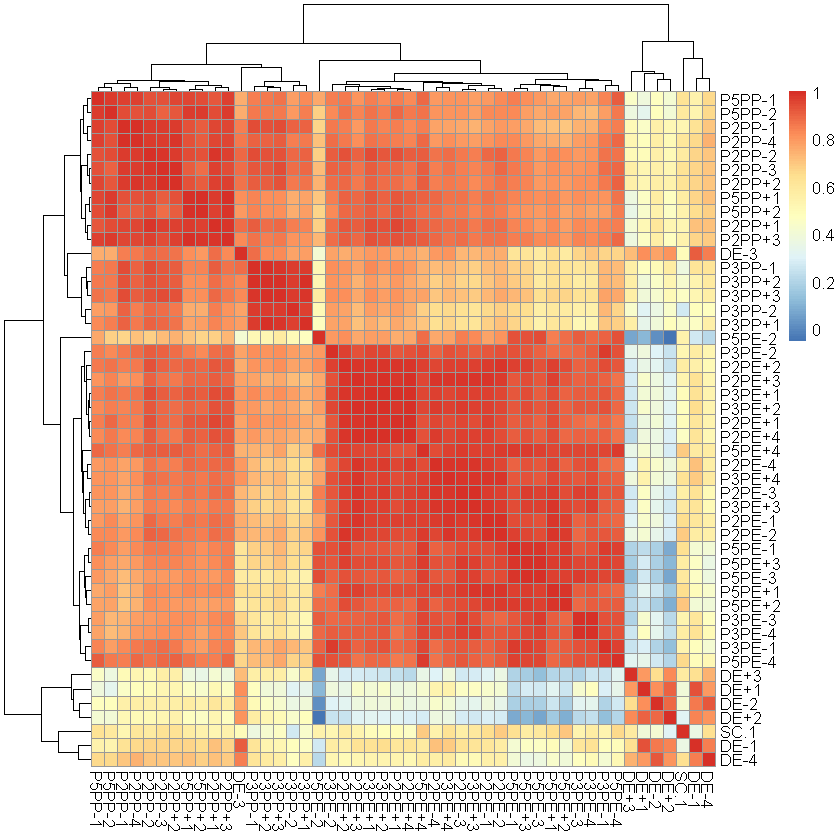

In [3]:
xc <- cor(x.t)
pheatmap(xc)
getwd()
setwd("C:\\Users\\abolf\\Desktop\\jupyter train\\intro bioinf sharifi practical")
getwd()

pdf("heatmap of cors.pdf", width = 14, height = 14)
pheatmap(xc)


# cor with another method

xc <- cor(x.t, method = "spearman")
pheatmap(xc)
dev.off()



4. what about using PCA instead?

In [4]:
# with PCA

pc <- prcomp(x)
dim(pc$r)
dim(pc$rotation)
head(pc$x)
pcx <-  data.frame(pc$x)
head(pcx)
pcx$sample <- rownames(pcx)
pcx$sample <- substr(pcx$sample, 1, nchar(pcx$sample) -2 )

pdf("pca of analysis.pdf", width = 10, height = 10)
ggplot(pcx, aes(PC1, PC2, color =sample)) + geom_point(size = 3) + theme_bw()
dev.off()
# pca was better in this research



[1] 9 9

[1] 9 9

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
SC.1,-9.093699,0.3498449,1.4819546,-0.3144679,-0.9020449,0.36197049,-0.1653060,0.112962556,-0.2219296
SC.2,-10.508959,0.5816797,2.1021061,0.1380932,-1.1885379,-0.45847872,-0.1023903,-0.033567399,-0.2163916
SC.3,-10.508959,0.5816797,2.1021061,0.1380932,-1.1885379,-0.45847872,-0.1023903,-0.033567399,-0.2163916
DE-1,-2.449101,-2.6326480,-2.9050748,1.2489314,0.3923838,-0.98498175,-0.1692248,-0.008704962,0.1670561
DE-2,-3.924503,-3.5045698,-1.8546891,0.1356705,-0.8044622,-0.01610691,0.1047858,1.180419741,0.4074695
DE-3,-2.469389,-2.4252831,-0.7083672,0.4834081,0.4540289,-0.31750717,0.2125931,0.200132696,0.6073775


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,-9.093699,0.3498449,1.4819546,-0.3144679,-0.9020449,0.36197049,-0.1653060,0.112962556,-0.2219296
SC.2,-10.508959,0.5816797,2.1021061,0.1380932,-1.1885379,-0.45847872,-0.1023903,-0.033567399,-0.2163916
SC.3,-10.508959,0.5816797,2.1021061,0.1380932,-1.1885379,-0.45847872,-0.1023903,-0.033567399,-0.2163916
DE-1,-2.449101,-2.6326480,-2.9050748,1.2489314,0.3923838,-0.98498175,-0.1692248,-0.008704962,0.1670561
DE-2,-3.924503,-3.5045698,-1.8546891,0.1356705,-0.8044622,-0.01610691,0.1047858,1.180419741,0.4074695
DE-3,-2.469389,-2.4252831,-0.7083672,0.4834081,0.4540289,-0.31750717,0.2125931,0.200132696,0.6073775


png 
  2

5. or ANOVA?

In [5]:
#anova
x.t <- t(x)
head(x.t)
# we need a data frame with : sample, gene, gene expression   cols

x.m <- melt(x)
head(x.m)
# we want 3 cols, matrix will give us 3 cols
x.m <- melt(as.matrix(x))
head(x.m)

colnames(x.m) <- c("Sample", "Gene", "Exp")
head(x.m)
dim(x.m)
dim(x)

,SC.1,SC.2,SC.3,DE-1,DE-2,DE-3,DE-4,DE+1,DE+2,DE+3,⋯,P5PP+1,P5PP+2,P5PE-1,P5PE-2,P5PE-3,P5PE-4,P5PE+1,P5PE+2,P5PE+3,P5PE+4
HLXb9,1.709291,1,1,7.073606,5.559798,5.725469,7.150661,7.402842,6.678072,7.177420,⋯,6.3601887,6.3476657,3.3377111,3.8288346,3.49952702,5.3847406,2.4931349,2.6438562,3.3936908,5.0682409
HHEX,1.521051,1,1,3.576522,5.241077,3.576522,5.241077,3.589763,5.241077,4.753818,⋯,4.0686708,4.0746767,0.1505597,0.8479969,0.07038933,1.2203300,0.1243281,0.1110313,0.0976108,1.1375035
HNF4a,1.956057,1,1,6.381629,5.148365,4.932156,5.988117,5.460415,4.199358,3.542258,⋯,8.4854268,8.4438967,6.8774989,6.8005117,7.26341006,6.6434233,7.9835067,7.7975967,7.2489712,7.9293176
ISL1,1.427606,1,1,4.804260,3.575312,4.804260,3.575312,5.358607,5.247168,5.547203,⋯,4.4356286,4.8659188,3.4776773,3.5945485,3.47767733,3.5945485,4.3334237,4.2750070,4.3334237,4.2750070
NEUROD1,2.201634,1,1,2.555816,2.833902,4.074677,4.536675,2.347666,2.353323,4.919340,⋯,7.3605399,7.4403709,7.6346659,7.4450976,6.39454844,7.6690977,6.5599506,7.8722131,6.9053268,7.5910361
NKX6.1,1.063503,1,1,2.157044,2.438293,2.157044,2.438293,2.087463,1.427606,2.405992,⋯,0.1243281,0.1375035,0.3219281,0.5360529,0.63226822,0.4541759,0.2016339,0.3448285,0.2387869,0.2265085


Using  as id variables



,variable,value
,<fct>,<dbl>
1,HLXb9,1.709291
2,HLXb9,1.000000
3,HLXb9,1.000000
4,HLXb9,7.073606
5,HLXb9,5.559798
6,HLXb9,5.725469


Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


,X1,X2,value
,<fct>,<fct>,<dbl>
1,SC.1,HLXb9,1.709291
2,SC.2,HLXb9,1.000000
3,SC.3,HLXb9,1.000000
4,DE-1,HLXb9,7.073606
5,DE-2,HLXb9,5.559798
6,DE-3,HLXb9,5.725469


,Sample,Gene,Exp
,<fct>,<fct>,<dbl>
1,SC.1,HLXb9,1.709291
2,SC.2,HLXb9,1.000000
3,SC.3,HLXb9,1.000000
4,DE-1,HLXb9,7.073606
5,DE-2,HLXb9,5.559798
6,DE-3,HLXb9,5.725469


[1] 450   3

[1] 50  9

6. checking our anova table

In [6]:
#both are the same
anova(aov(Exp~Sample+Gene, x.m))
anova(aov(Exp~Gene+Sample, x.m))

#data was big so anova would say there is difference by batch


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,49,323.7034,6.606191,3.349308,1.994634e-11
Gene,8,2112.7484,264.093547,133.894204,3.937172e-107
Residuals,392,773.1826,1.972405,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Gene,8,2112.7484,264.093547,133.894204,3.937172e-107
Sample,49,323.7034,6.606191,3.349308,1.994634e-11
Residuals,392,773.1826,1.972405,NA,NA


7.  lets say we just want to check with anova in  some of DEs

In [7]:
head(x)

x.m <- melt(as.matrix(x[4:6,]))
x.m
colnames(x.m) <- c("Sample", "Gene", "Exp")
anova(aov(Exp~Sample+Gene, x.m))
# significant difference for genes but not for samples(replicates of samples)
#which is good
#because now the samples are biological replacate of 1 kind of cell 
#but the previous was with all kind of cells which wrong in its analysis concept


,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
SC.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SC.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768


Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


X1,X2,value
<fct>,<fct>,<dbl>
DE-1,HLXb9,7.073606
DE-2,HLXb9,5.559798
DE-3,HLXb9,5.725469
DE-1,HHEX,3.576522
DE-2,HHEX,5.241077
DE-3,HHEX,3.576522
DE-1,HNF4a,6.381629
DE-2,HNF4a,5.148365
DE-3,HNF4a,4.932156


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,2,0.2127602,0.1063801,0.2294793,7.97519e-01
Gene,8,55.2627781,6.9078473,14.9013581,4.54754e-06
Residuals,16,7.4171465,0.4635717,NA,NA


8. now lets check anova for all DEs

In [8]:

rownames(x)
# DEs are 4 to 10
x.m <- melt(as.matrix(x[4:10,]))
colnames(x.m) <- c("Sample", "Gene", "Exp")
anova(aov(Exp~Sample+Gene, x.m))
# still good


[1] "SC.1"   "SC.2"   "SC.3"   "DE-1"   "DE-2"   "DE-3"   "DE-4"   "DE+1"  
 [9] "DE+2"   "DE+3"   "P2PP-1" "P2PP-2" "P2PP-3" "P2PP-4" "P2PP+1" "P2PP+2"
[17] "P2PP+3" "P2PE-1" "P2PE-2" "P2PE-3" "P2PE-4" "P2PE+1" "P2PE+2" "P2PE+3"
[25] "P2PE+4" "P3PP-1" "P3PP-2" "P3PP+1" "P3PP+2" "P3PP+3" "P3PE-1" "P3PE-2"
[33] "P3PE-3" "P3PE-4" "P3PE+1" "P3PE+2" "P3PE+3" "P3PE+4" "P5PP-1" "P5PP-2"
[41] "P5PP+1" "P5PP+2" "P5PE-1" "P5PE-2" "P5PE-3" "P5PE-4" "P5PE+1" "P5PE+2"
[49] "P5PE+3" "P5PE+4"

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,6,1.622622,0.2704370,0.4531281,8.391747e-01
Gene,8,141.557994,17.6947492,29.6482631,4.605743e-16
Residuals,48,28.647478,0.5968225,NA,NA


9.  but now lets add another sample with DEs :

In [9]:

x.m <- melt(as.matrix(x[3:10,]))
colnames(x.m) <- c("Sample", "Gene", "Exp")
anova(aov(Exp~Sample+Gene, x.m))
# now you see significant difference with samples too

Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"
Warning message in type.convert.default(X[[i]], ...):
"'as.is' should be specified by the caller; using TRUE"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,7,63.56224,9.0803201,10.97267,1.240723e-08
Gene,8,123.86324,15.4829056,18.70956,2.726663e-13
Residuals,56,46.34223,0.8275398,NA,NA
